Sheet 1 

1) Implement the kNN algorithm shown in the lecture to make predictions. Write a class
in Python called NearestNeighbors with two functions train(X, y) and predict(X).
Here, X is a 2D numpy array (a matrix with n lines for instances and d columns for
attributes), and y is a n-vector with the labels for the given instances. The function
train memorizes the data (does not return anything), and predict returns a vector of
same length as the input matrix with the predicted label for each given instance (you may
want to check the argsort function of numpy for this). The class NearestNeighbors
might have a parameter k that defines the number of parameters considered here

In [295]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [296]:
# def class
class NearestNeighbors:
    def __init__(self, K):
        self.K = K

    def train(self, X, Y):
        self.X = X
        self.Y = Y

    def predict(self, Y):
        # answers array
        ans = []
        # for each point to predict
        for y in Y:
            distances = []
            # add distance and label  to array
            for index in range(len(self.X)):
                point = self.X[index]
                label = self.Y[index]
                distances.append([np.linalg.norm(point-y), label])
            # sort array by distance
            distances = sorted(distances, key=lambda x: x[0])
            # get K nearest neighbor distance
            r = distances[self.K][0]
            # filter points <= r
            distances = list(filter(lambda x: x[0] <= r, distances))
            # dictionary to save same labels
            dicti = {}
            for item in distances:
                if item[1] not in dicti.keys():
                    dicti[item[1]] = 0
                dicti[item[1]] = dicti[item[1]]+1
            # find label with max points in r
            # add to answers array
            ans.append(max(dicti, key=dicti.get))
        return ans


# Read dataset
df = pd.read_csv('iris.csv')
# get first 4 rows
X = df.iloc[:, :4].to_numpy()
# get labels
Y = df.iloc[:, 4].to_numpy()
# create model
model = NearestNeighbors(5)
model.train(X, Y)
arrayToPredict = [[5, 3.6, 1.4, 0.2], [5.5, 2.3, 4, 1.3], [7.2, 3.6, 6.1, 2.5]]
print(model.predict(arrayToPredict))

['setosa', 'versicolor', 'virginica']


2) Implement a function cross_validate(learner, X, y, train_size, repeats) that
takes a learner object and builds repeats many random splits of the given data, each one
with a relative portion of train_size training instances (for example 0.7 to use 70% of
the data for training in each iteration) and the rest for validation. In each main loop of
the validation, a random split of the data is built (you may want to use random.sample to
get a random subset of indices for the chosen instances) and the learner is trained on the
training portion and then must make predictions on the remaining data. Compare the
predictions to the true labels of the remaining data and count the number of mistakes.
For each repetition, memorize the mean number of false predictions, called the error
rate. Then finally return the mean error rate of the folds.

In [297]:
# imports
import random

In [298]:
def cross_validate(learner, X, Y, train_size, repeats):
    # init error rate
    errorRate = 0
    for repeat in range(repeats):
        # get sample indexes  to train
        trainIndexes = random.sample(range(len(X)), int(len(X)*train_size))
        # get sample indexes  to test
        testIndexes = [val for val in range(len(X)) if val not in trainIndexes]
        # get the sample of instances to train
        trainX = X.iloc[trainIndexes].to_numpy()
        # get the sample of labels to train
        trainY = Y.iloc[trainIndexes].to_numpy()
        # get the sample of instances to test
        testX = X.iloc[testIndexes].to_numpy()
        # get the sample of labels to test
        testY = Y.iloc[testIndexes].to_numpy()
        # train the learner with the samples
        learner.train(trainX, trainY)
        # predict with test instances sample 
        # compare to test learner sample
        # subtract the amount from the total test labels with the comparison
        errorRate = errorRate + (len(testY)-sum(learner.predict(testX) == testY))/len(testY)
    return errorRate/repeats
# Read dataset
df = pd.read_csv('iris.csv')
# get first 4 rows
X = df.iloc[:, :4]
# get labels
Y = df.iloc[:, 4]
# test
cross_validate(NearestNeighbors(5), X, Y, 0.7, 10)


0.03111111111111111

3) Load the iris dataset (you can use pandas.read_csv) and create objects X and y from
it, using the class column for y. Compute and report the average error rate of the kNN
classifier for 10 repetitions and a training size of 70%.
Now compute the error for different training set sizes of 5, 10, 15, ..., 100 training
instances (choose the training portion appropriately). Collect the results and plot a
learning curve. How many training examples are necessary on average to obtain a error
rate lower than 10%?

In [299]:
# imports
import matplotlib.pyplot as plt
from tqdm import tqdm

Error mean with 10 repetitions and a training size of 70%. =  0.05111111111111111


100%|██████████| 20/20 [01:23<00:00,  4.19s/it]

to obtain a error rate lower than 10% are necessary at least 20 training examples


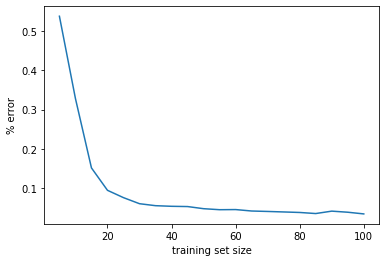

In [300]:
# Read dataset
df = pd.read_csv('iris.csv')
# get first 4 rows
X = df.iloc[:, :4]
# get labels
Y = df.iloc[:, 4]
# test
errorMean = cross_validate(NearestNeighbors(5), X, Y, 0.7, 10)
print("Error mean with 10 repetitions and a training size of 70%. = ",errorMean)
# array to plot errors
errors = []
# array from 5 to 105
temp =  range(5,105,5)
for size in tqdm(temp):
    # get percentage to get the wanted size
    percentage=size/len(X)
    # add error to array
    errors.append(cross_validate(NearestNeighbors(4), X, Y, percentage, 100))
# plot learning curve
plt.plot(temp, errors)
plt.xlabel("training set size")
plt.ylabel("% error")
print("to obtain a error rate lower than 10% are necessary at least 20 training examples")

4) In this exercise, we only consider the first two attributes (columns) of the iris dataset
(and the class column). Now train the kNN classifier on all the data X from the iris
dataset using the first two attributes.
Now create discretizations of the domains U = [4, 8] and V = [2, 5] such that each
domain has 100 values (see linspace of numpy). We can consider U and V as being
lists of length 100 each; denote as Ui or Vi the i-the element of each list.
Create a 100 × 100 matrix Z in which Zi,j is the prediction of the kNN classifier on the
instance xi,j = (Ui
, Vj ).
Now create 2 plots. In the first, create a scatter plot in which you show all the data of the
iris set, each class in a different color. In the second, create an image map of the matrix
Z (use the imshow function of matplotlib). For the latter, replace the string-valued
predictions by the values 0, 1, 2.
Do you think that kNN manages to do a good separation of the classes?

100%|██████████| 100/100 [00:21<00:00,  4.55it/s]


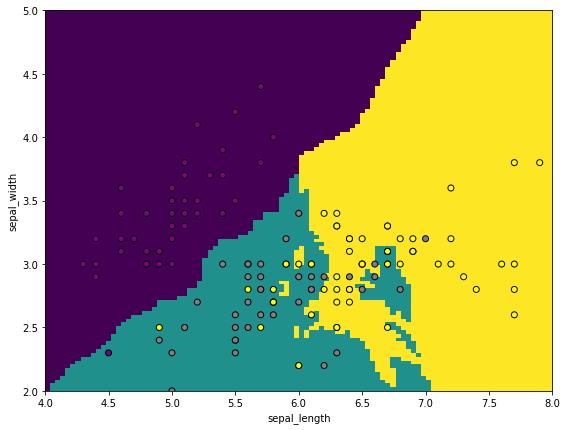

In [301]:
# Read dataset
df = pd.read_csv('iris.csv')
# get first 4 rows
X = df.iloc[:, :2].to_numpy()
# get labels
Y = df.iloc[:, 4].to_numpy()
# def num of points
length = 100
# create domains
U = np.linspace(4.0, 8.0, num=length)
V = np.linspace(2.0, 5.0, num=length)
# create Z
Z = [['' for i in range(length)] for j in range(length)]
# create model
model = NearestNeighbors(5)
model.train(X, Y)
# dictionary to convert to 0,1,2
dicti = ['setosa', 'versicolor', 'virginica']
# fill Z
for i in tqdm(range(length)):
    for j in range(length):
        Z[i][j] = dicti.index(model.predict([[U[i], V[j]]])[0])

# plot graphs
colors = {'setosa': 'purple', 'versicolor': 'gray', 'virginica': 'yellow'}
fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.scatter(X[:, 0], X[:, 1], edgecolor='k', c=df["species"].map(colors))
# ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.array(Z).transpose(),extent=(4,8,2,5),origin='lower')
ax.grid(b=None)
ax.grid()
